## Observations and Insights 

Trend #1
Based off the pie chart, we can see it is almost an even split netween male mice and female mice use in the experiment.

Trend #2
Based off the scatter plot, we can see that for mice treated by Capomulin that Tumor Volume and Weight have a positive correlation. As one rises, so does the other.

Trend #3
Based off the summary statistics, we can see that Capomulin and Ramicane seem to be the most effective drugs because they have the lowest mean and median of Tumor Volume among all the drugs.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pprint import pprint
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data = pd.merge(mouse_metadata,study_results,on = ["Mouse ID","Mouse ID"])
# Display the data table for preview
data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
numberOfMice = len(data["Mouse ID"].unique())
numberOfMice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 



In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dataClean = pd.DataFrame()

dataClean = data.drop_duplicates(["Mouse ID","Timepoint"],keep = "first")
dataClean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
len(dataClean["Mouse ID"].unique())

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summaryStats = pd.DataFrame()

mean = dataClean.groupby("Drug Regimen").mean()
median = dataClean.groupby("Drug Regimen").median()
variance = dataClean.groupby("Drug Regimen").var()
sd = dataClean.groupby("Drug Regimen").std()
sem = dataClean.groupby("Drug Regimen").sem()
summaryStats["mean"] = mean["Tumor Volume (mm3)"]
summaryStats["median"] = median["Tumor Volume (mm3)"]
summaryStats["variance"] = variance["Tumor Volume (mm3)"]
summaryStats["standard deviation"] = sd["Tumor Volume (mm3)"]
summaryStats["SEM"] = sem["Tumor Volume (mm3)"]
summaryStats

,mean,median,variance,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summaryAggAll = dataClean.groupby(["Drug Regimen"]).agg(["mean","median","var","std","sem"])
summaryAgg = summaryAggAll["Tumor Volume (mm3)"]
summaryAgg


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

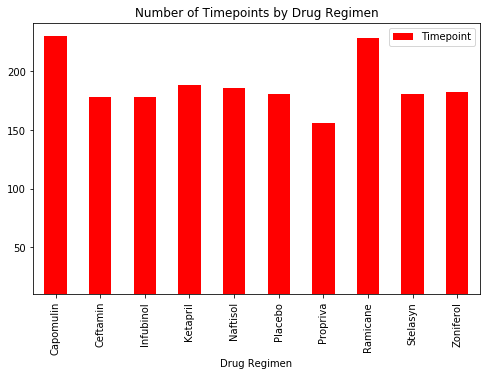

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
barChart = dataClean.groupby("Drug Regimen").count()

barChart.plot(y = "Timepoint",kind = "bar", title = "Number of Timepoints by Drug Regimen", figsize = (8,5), color = "red", xlim = 235, ylim = 10)


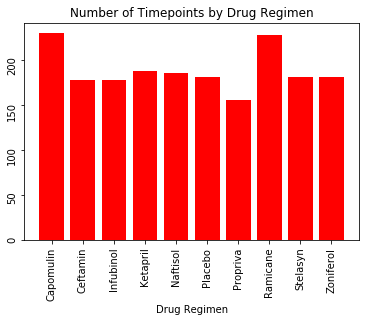

<Figure size 576x360 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
groupedData = dataClean.groupby("Drug Regimen").count()
dataSorted = dataClean.sort_values(by = "Drug Regimen")
xAxis = dataSorted["Drug Regimen"].unique()
yAxis = groupedData["Timepoint"]
plt.bar(xAxis,yAxis,color = "red")
plt.title("Number of Timepoints by Drug Regimen")
plt.tick_params(labelrotation = 90)
plt.xlabel("Drug Regimen")
plt.figure(figsize = (8,5))
plt.show()




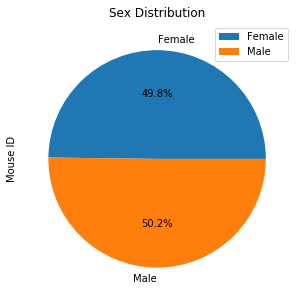

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
dataUnique = data.drop_duplicates("Mouse ID",keep = "first")
pieChart = dataUnique.groupby("Sex").count()
pieChart.plot(y = "Mouse ID" , kind = "pie", figsize = (8,5),title = "Sex Distribution",autopct='%1.1f%%',legend = "best")


<Figure size 576x360 with 0 Axes>

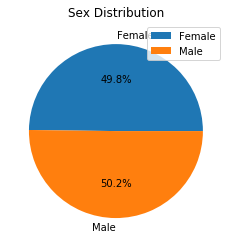

<Figure size 576x360 with 0 Axes>

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

y = dataUnique.groupby("Sex").count()
labels = ["Female","Male"]
plt.pie(y["Mouse ID"],labels = labels,autopct='%1.1f%%')
plt.title("Sex Distribution")
plt.legend(loc = "best")
plt.figure(figsize = (8,5))

## Quartiles, Outliers and Boxplots

In [60]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
data4 = dataClean.loc[(dataClean["Drug Regimen"] == "Capomulin") | (dataClean["Drug Regimen"] == "Ramicane") | (dataClean["Drug Regimen"] == "Infubinol") | (dataClean["Drug Regimen"] == "Ceftamin")]
# Start by getting the last (greatest) timepoint for each mouse
data4final = data4.drop_duplicates("Mouse ID",keep = "last")
data4final
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
newData = pd.merge(data4final,data,on = ["Mouse ID","Mouse ID"])
newData
data4final

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3


In [47]:
# Put treatments into a list for for loop (and later for plot labels)

#treatmentList = ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
treatmentList = ["Capomulin","Ceftamin","Infubinol","Ramicane"]

# Create empty list to fill with tumor vol data (for plotting)

emptyList = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = dataClean["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerQ = quartiles[0.25]
upperQ = quartiles[0.75]
iqr = upperQ - lowerQ

lowerBound = lowerQ - (1.5*iqr)
upperBound = upperQ + (1.5*iqr)
    
# Locate the rows which contain mice on each drug and get the tumor volumes
 
for treatments in treatmentList:
    x = data4final.loc[data4final["Drug Regimen"] == treatments]
    emptyList.append(data4final["Tumor Volume (mm3)"])
    
    
# add subset 

possibleOutliers = []
    
# Determine outliers using upper and lower bounds

possibleOutliers = data4final.loc[(data4final["Tumor Volume (mm3)"] > upperBound) | (data4final["Tumor Volume (mm3)"] < lowerBound)]

print(emptyList)        

[9       22.050126
19      23.343598
29      28.484033
39      28.430964
49      29.128472
          ...    
1797    61.386660
1813    67.685569
1845    68.594745
1855    64.729837
1872    62.754451
Name: Tumor Volume (mm3), Length: 100, dtype: float64, 9       22.050126
19      23.343598
29      28.484033
39      28.430964
49      29.128472
          ...    
1797    61.386660
1813    67.685569
1845    68.594745
1855    64.729837
1872    62.754451
Name: Tumor Volume (mm3), Length: 100, dtype: float64, 9       22.050126
19      23.343598
29      28.484033
39      28.430964
49      29.128472
          ...    
1797    61.386660
1813    67.685569
1845    68.594745
1855    64.729837
1872    62.754451
Name: Tumor Volume (mm3), Length: 100, dtype: float64, 9       22.050126
19      23.343598
29      28.484033
39      28.430964
49      29.128472
          ...    
1797    61.386660
1813    67.685569
1845    68.594745
1855    64.729837
1872    62.754451
Name: Tumor Volume (mm3), Length: 100, dty

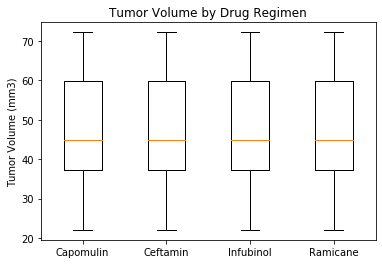

In [68]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tick = [1,2,3,4]


fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume by Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(emptyList)
plt.xticks(ticks = tick,labels = treatmentList)
plt.show()

## Line and Scatter Plots

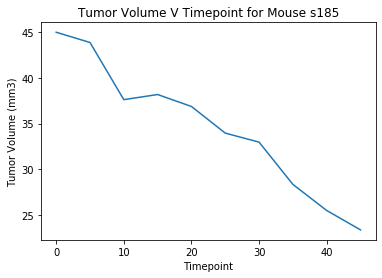

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capData = dataClean.loc[dataClean["Drug Regimen"] == "Capomulin"]
capOneM = capData.loc[capData["Mouse ID"] == "s185"]
#capOneM.plot("Timepoint","Tumor Volume (mm3)",kind = "line",title = "Tumor Volume V Timepoint for Mouse s185")
plt.plot(capOneM["Timepoint"],capOneM["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume V Timepoint for Mouse s185")
plt.show()

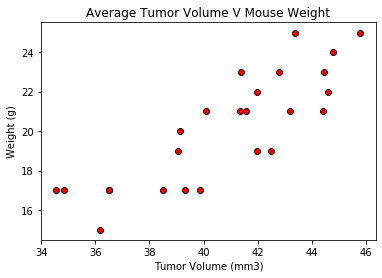

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capData = dataClean.loc[dataClean["Drug Regimen"] == "Capomulin"]
dataScat = capData.groupby("Mouse ID").mean()
#dataScat.plot("Tumor Volume (mm3)","Weight (g)",kind = "scatter",figsize = (8,5),color = "red",edgecolors = "black",title = "Average Tumor Volume V Mouse Weight")
plt.scatter(dataScat["Tumor Volume (mm3)"],dataScat["Weight (g)"],color = "red",edgecolor = "black")
plt.title("Average Tumor Volume V Mouse Weight")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.show()

## Correlation and Regression

The r-squared is: 0.7088568047708717


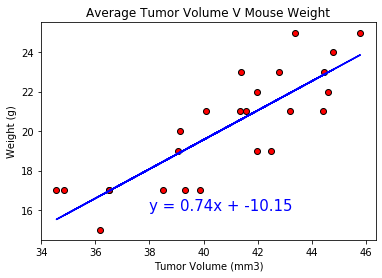

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(dataScat["Tumor Volume (mm3)"], dataScat["Weight (g)"])
regressValues = dataScat["Tumor Volume (mm3)"] * slope + intercept
lineEq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(dataScat["Tumor Volume (mm3)"],dataScat["Weight (g)"],color = "red",edgecolor = "black")
plt.plot(dataScat["Tumor Volume (mm3)"],regressValues,"b-")
plt.annotate(lineEq,(38,16),fontsize=15,color="blue")
plt.title("Average Tumor Volume V Mouse Weight")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
print(f"The r-squared is: {rvalue**2}")
plt.show()